In [269]:
#add dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
#add dependencies
import numpy as np
import pandas as pd

In [3]:
#add dependencies
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [23]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [24]:
#create engine
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [25]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [26]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [27]:
# Save references to each table

Measurement = Base.classes.measurement

Station = Base.classes.station


In [28]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [32]:
#choose a date, inspect station

columns_one = inspector.get_columns('station')
for c_o in columns_one:
    print(c_o['name'], c['type'])

id FLOAT
station FLOAT
name FLOAT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [30]:
#choose a date, inspect measurement

columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [31]:
#engine execute to fetachall data for measurement

engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [34]:
#dates in total
session.query(func.count(Measurement.date)).all()

[(19550)]

In [35]:
#earliest date
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [36]:
#latest date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [55]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Sort by date

date_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-22').\
    filter(Measurement.prcp).\
    order_by(Measurement.date).all()

date_prcp

[('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.12),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.05),
 ('2016-08-31', 0.13),
 ('2016-08-31', 0.1),
 ('2016-08-31', 0.25),
 ('2016-08-31', 0.24),
 ('2016-08-31', 2.46),
 ('2016-09-01', 0.02),
 ('2016-09-01', 0.01),
 ('2016-09-02', 0.02),
 ('2016-09-02',

In [60]:
# Save the query results as a Pandas DataFrame and set the index to the date column

dp_df = pd.DataFrame(date_prcp)

dp_index = dp_df.set_index('date')

dp_index


,prcp
date,
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
...,...
2017-08-21,0.02
2017-08-21,0.56
2017-08-22,0.50


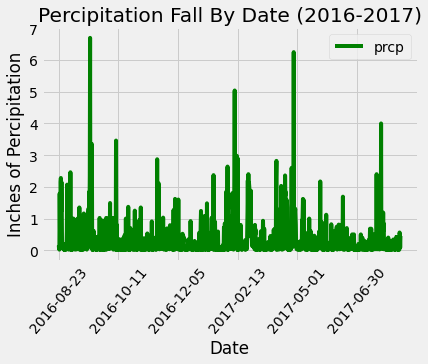

In [141]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Use Pandas Plotting with Matplotlib to plot the data

bar_chart = dp_index.plot(rot=50, color='green')

bar_chart.set_title("Percipitation Fall By Date (2016-2017)")
bar_chart.set_xlabel("Date")
bar_chart.set_ylabel("Inches of Percipitation")

plt.savefig("../completed_images/prcp_date.png")

plt.show()

In [142]:
# Use Pandas to calculate the summary statistics for the precipitation data

stat_summary = dp_index.describe()

stat_summary

,prcp
count,1147.000000
mean,0.312363
std,0.576781
min,0.010000
25%,0.030000
50%,0.100000
75%,0.310000
max,6.700000


In [146]:
# use engine execute to view limited dataset for station

engine.execute('SELECT * FROM station LIMIT 10').fetchall()


[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [272]:
# Design a query to show how many stations are available in this dataset?

total_stations = session.query(func.count(Station.id)).all()

total_stations

[(9)]

In [158]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [214]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
#filter by highest number of observations

sel = [Measurement.station,
      func.max(Measurement.tobs),
      func.avg(Measurement.tobs),
      func.min(Measurement.tobs)]
tobs_breakdown = session.query(*sel).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
    
tobs_breakdown

[('USC00519281', 85.0, 71.66378066378067, 54.0),
 ('USC00519397', 87.0, 74.55323054331865, 56.0),
 ('USC00513117', 85.0, 72.68918420081211, 59.0),
 ('USC00519523', 85.0, 74.5436493068565, 56.0),
 ('USC00516128', 84.0, 70.91500765696784, 58.0),
 ('USC00514830', 85.0, 74.8732970027248, 58.0),
 ('USC00511918', 87.0, 71.61596766043456, 53.0),
 ('USC00517948', 87.0, 74.68440233236151, 58.0),
 ('USC00518838', 83.0, 72.72407045009784, 58.0)]

In [223]:
#pull out highest number of obeservations, filter USC00519281

single_station_breakdown = session.query(*sel).\
    group_by(Measurement.station).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.station).all()
    
single_station_breakdown

[('USC00519281', 85.0, 71.66378066378067, 54.0)]

In [235]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

last_12_months_station = session.query(Measurement.date, Measurement.tobs).\
                            filter(Measurement.station == 'USC00519281').\
                            filter(Measurement.date > '2016-08-22').\
                            order_by(Measurement.station).all()
last_12_months_station

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [247]:
#create dataframe to change into bins and graphc
station_df = pd.DataFrame(last_12_months_station, columns=["date","tobs"])
station_df

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
...,...,...
347,2017-08-14,77.0
348,2017-08-15,77.0
349,2017-08-16,76.0
350,2017-08-17,76.0


In [251]:
#max/min of the tobs

print(station_df.min())
print(station_df.max())

date    2016-08-23
tobs            59
dtype: object
date    2017-08-18
tobs            83
dtype: object


In [252]:
#create bins=12, 

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]

labels = ["0 to 10", "11 to 20", "21 to 30", "31, 40", "41, 50", "51, 60", "61, 70", "71, 80", "81, 90", "91, 100", "101, 110"]
    
    

In [253]:
#pd.cut for bins 

pd.cut(station_df["tobs"], bins, labels=labels).head()

0    71, 80
1    71, 80
2    71, 80
3    71, 80
4    71, 80
Name: tobs, dtype: category
Categories (11, object): [0 to 10 < 11 to 20 < 21 to 30 < 31, 40 ... 71, 80 < 81, 90 < 91, 100 < 101, 110]

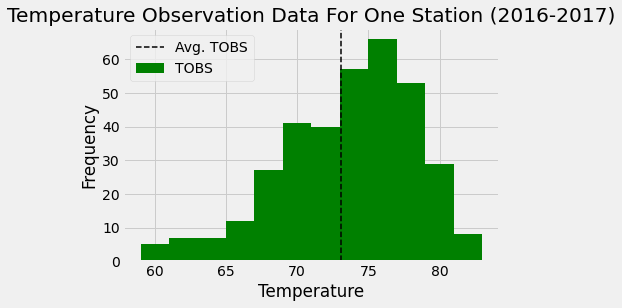

In [268]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#create histogram

histogram = station_df.plot=station_df["tobs"].hist(bins=12, label="TOBS", color='g')
plt.axvline(station_df["tobs"].mean(), color='k', linestyle='dashed', linewidth=1.5, label="Avg. TOBS")

plt.title("Temperature Observation Data For One Station (2016-2017)")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend()

plt.savefig("../completed_images/histogram.png")
plt.show()


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
